# GloVe
https://github.com/JonathanRaiman/glove

In [1]:
import glove

### Read data

In [2]:
import pandas as pd
import numpy as np

In [3]:
# grab words I picked to represent emotions
from emotions import all_flag_words

In [4]:
with open('../data/all_raw_comments_with_stop_words') as f:
    comments = f.read().split('\n')[:100]

In [5]:
words_dict_counter = {}
# how far we want to look around word
step = 5

for comment in comments: # let's to first iteration
    listed_comment = comment.split() # ['a', 'b', 'c']

    for i, word in enumerate(listed_comment): # 1, 'a'

        if word not in words_dict_counter.keys(): # create 'a' key in container
            words_dict_counter[word] = {}

        if i-step < 0: # if the beginning of the comment
            first_index = 0 # get first words
            to_delete = i # and delete middle one
        else:
            first_index = i-step
            to_delete = step

        corresponding_words = listed_comment[first_index: i+step+1] # ['a', 'b', 'c']
        del corresponding_words[to_delete] # ['b', 'c']
        
        for corresponding_word in corresponding_words:
            if corresponding_word not in words_dict_counter[word].keys():
                words_dict_counter[word][corresponding_word] = 1 # {'b': 1}, {'c': 1} 
            else:
                words_dict_counter[word][corresponding_word] += 1

In [6]:
words = [word for com_list in [com.split(' ') for com in comments] for word in com_list]

In [7]:
len(words)

2305

In [8]:
unique_words = set(words)

In [9]:
len(unique_words)

1313

In [10]:
unique_words = list(unique_words)

In [11]:
word2int = {}
int2word = {}
for i,word in enumerate(unique_words):
    word2int[word] = i
    int2word[i] = word

In [12]:
int_dict_counter = {}

for key, item in words_dict_counter.items():
    tmp = {}
    for sub_key, occur in item.items():
        tmp[word2int[sub_key]] = occur
    int_dict_counter[word2int[key]] = tmp

In [13]:
model = glove.Glove(int_dict_counter, d=10)

In [14]:
err = []
for epoch in range(10):
    err.append(model.train(batch_size=30))

In [15]:
err[:5]

[0.0026696492330232566,
 0.0021970384102066452,
 0.002044868070175219,
 0.001980554293951234,
 0.001945483412671115]

In [16]:
import matplotlib.pyplot as plt

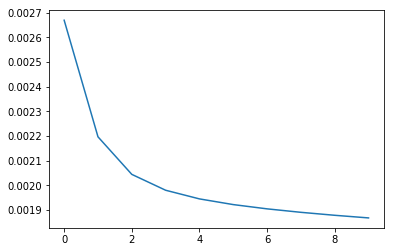

In [17]:
fig, ax = plt.subplots()
plt.plot(err)

In [18]:
vectors = model.W

In [19]:
from sklearn.manifold import TSNE

/home/jacek/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [20]:
# Let's do PCA on vactors so it will be possible to visualize them
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

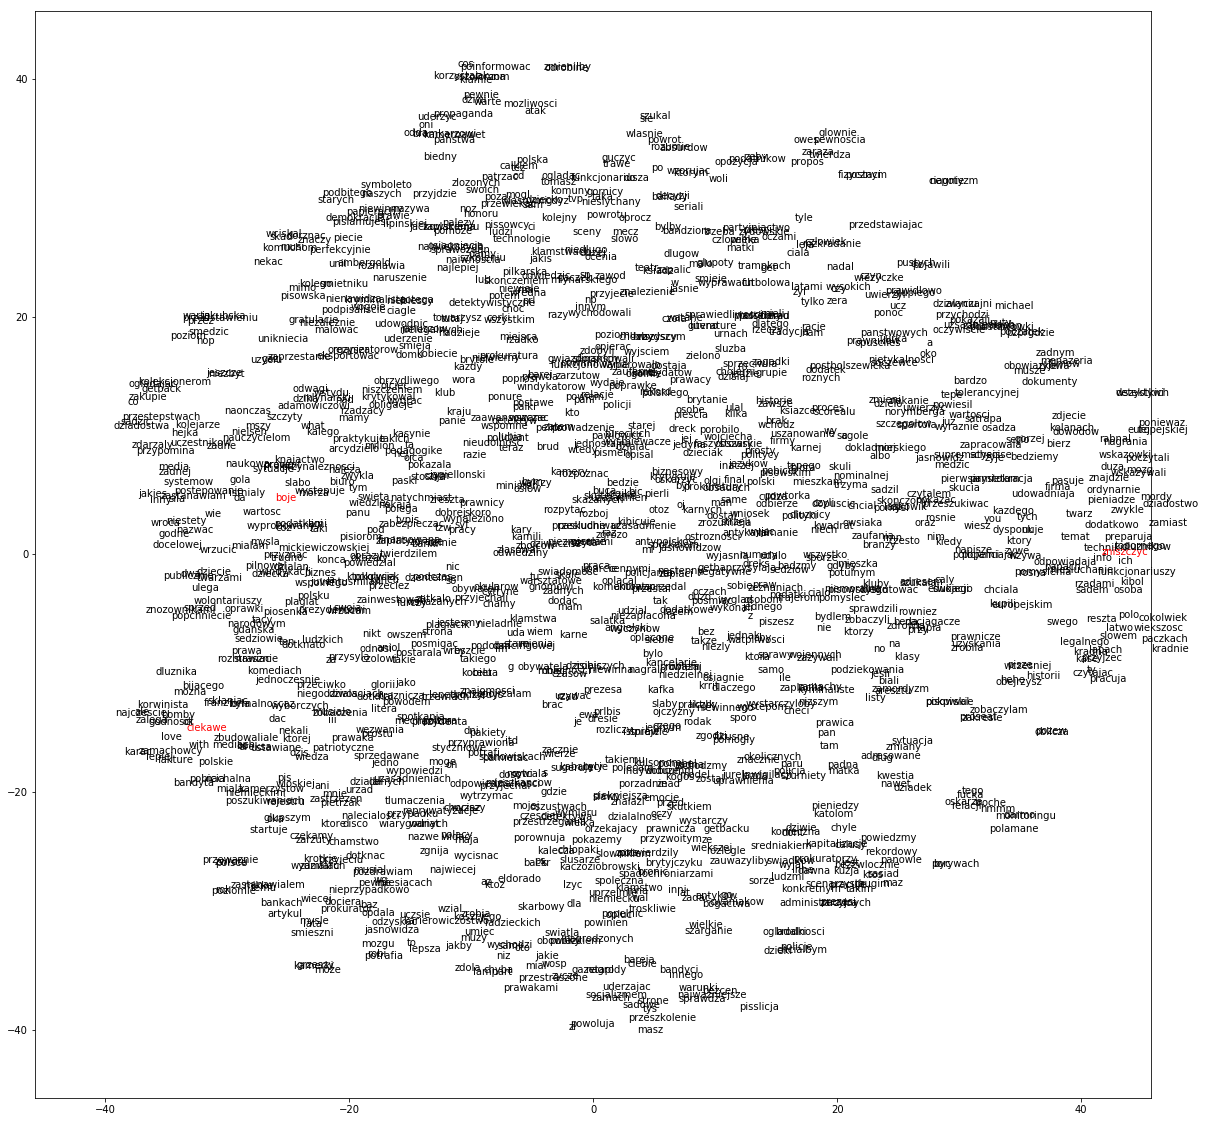

In [21]:
a = max(vectors.T.max(), -vectors.T.min())
fig, ax = plt.subplots(figsize = (20,20))
ax.axis([-a, a, -a, a])
for word in unique_words:
    if word in all_flag_words:
        ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ), color = 'red')
    else:
        ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

In [22]:
from scipy.spatial.distance import cosine

In [23]:
def find_closest(flag_word):
    desired_word_vec = vectors[word2int[flag_word]]
    distances = {}
    for i, vector in enumerate(vectors):
        distances[cosine(desired_word_vec, vector)] = i
    words = []
    for close_key in sorted(distances.keys())[1:11]:
        words.append(int2word[distances[close_key]])
    return words

In [24]:
find_closest('boje')

['systemow',
 'istnialy',
 'kamili',
 'tvpis',
 'panu',
 'pracy',
 'zadnej',
 'tzw',
 'da',
 'syf']

Another think I cannot apply on home computer. Let's try a simpler solutions